# Cosmic Ray Proton Spectrum Fitting
## NUCLEON

In [1]:
from pylab import *
from scipy.optimize import minimize 
from scipy import interpolate

In [6]:
def Phi_onebreak(E, K, E0, alpha1, alpha2, omega1, Eb1):
    delta1 = alpha2 - alpha1
    return K * (E/E0)**(-alpha1) * (1 + (E/Eb1)**(1/omega1))**(-delta1 * omega1)

In [7]:
data_NUCLEON_H = np.genfromtxt("Data/NUCLEON_H_data.txt")
E_NUCLEON = data_NUCLEON_H[:,1]
flux_NUCLEON = data_NUCLEON_H[:,3]
error_NUCLEON = data_NUCLEON_H[:,4]

In [8]:
E = E_NUCLEON
Flux = flux_NUCLEON
Sigma = 2*error_NUCLEON

index = np.where(np.logical_and(E>=1e2, E<=1e5))
E = E[index]; Flux = Flux[index]; Sigma = Sigma[index]

# Check number of degrees of freedom
print('# data points used:', 11)
print('# actual data points:', len(Flux))

def Chi_NUCLEON(parameters):
    K, alpha2, alpha3, omega2, Eb2 = parameters
    Phi_model = Phi_onebreak(E, K, 2 * 1e3, alpha2, alpha3, omega2, Eb2)
    return sum( (Phi_model - Flux)**2 / Sigma**2 ) 

# data points used: 11
# actual data points: 6


In [9]:
# Check of chi^2 with reported value
alpha2_bestfit_NUCLEON = 2.44
alpha3_bestfit_NUCLEON = 2.86
Eb2_bestfit_NUCLEON = 9.5 * 1e3 #GeV
omega2_bestfit_NUCLEON = 0.24
K_bestfit_NUCLEON = 1.26 * 10**(-5) #(GeV m2 s sr)-1

parameters_bestfit_NUCLEON = K_bestfit_NUCLEON, alpha2_bestfit_NUCLEON, alpha3_bestfit_NUCLEON, omega2_bestfit_NUCLEON, Eb2_bestfit_NUCLEON
print('Min chi^2 from Lipari & Vernetto:', 3.4)
print('Computed chi^2:', Chi_NUCLEON(parameters_bestfit_NUCLEON) )

Min chi^2 from Lipari & Vernetto: 3.4
Computed chi^2: 1.854200132715965


In [12]:
# Minimization of chi^2
#bounds_range = ((9e-6,2e-5),(2,3),(2,3),(0.0001,1),(1e2,1e5))
output = minimize(Chi_NUCLEON, (K_bestfit_NUCLEON, alpha2_bestfit_NUCLEON, alpha3_bestfit_NUCLEON, omega2_bestfit_NUCLEON, Eb2_bestfit_NUCLEON), method='L-BFGS-B')
best_fit_values = output['x']

# Best fit values
print('LIPARI & VERNETTO BEST FIT VALUES:')
print('K:', round(K_bestfit_NUCLEON,7)); 
print('alpha_1:', round(alpha2_bestfit_NUCLEON,3)); print('alpha_2:', round(alpha3_bestfit_NUCLEON,3))
print('omega:', round(omega2_bestfit_NUCLEON,3))
print('E_b:', round(Eb2_bestfit_NUCLEON,4), 'GeV')
print('')

print('MY BEST FIT VALUES:')
print('K:', round(best_fit_values[0],7))
print('alpha_1:', round(best_fit_values[1],3)); print('alpha_2:', round(best_fit_values[2],3))
print('omega:', round(best_fit_values[3],3))
print('E_b:', round(best_fit_values[4],3), 'GeV')
print('')

min_chi = Chi_NUCLEON(best_fit_values)
print('chi^2_min:', round(min_chi,7))

LIPARI & VERNETTO BEST FIT VALUES:
K: 1.26e-05
alpha_1: 2.44
alpha_2: 2.86
omega: 0.24
E_b: 9500.0 GeV

MY BEST FIT VALUES:
K: 1.18e-05
alpha_1: 2.416
alpha_2: 2.628
omega: 0.296
E_b: 9500.0 GeV

chi^2_min: 0.3089686


In [13]:
def Errors_NUCLEON(n):
    
    alpha2 = 2.44
    alpha3 = 2.86
    Eb2 = 9.5 * 1e3 #GeV
    omega2 = 0.24
    K = 1.26 * 10**(-5) #(GeV m2 s sr)-1
    output = minimize(Chi_NUCLEON, (K, alpha2, alpha3, omega2, Eb2), method='L-BFGS-B')
    best_fit_values = output['x']
    
    scan = np.zeros(500)
    fit = best_fit_values[n]
    for i in range(0, 250):
        scan[i] = fit - (fit / 1000)*i
    for j in range(250, 500):
        scan[j] = fit + (fit / 1000)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_NUCLEON(best_fit_values)
    chi_sqrd = np.zeros(500)
    for k in range(0, 500):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_NUCLEON(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
    return scan, fit, chi_sqrd

# Find value for which chi^2 is equal to one
yToFind = 5.89

scan, fit, chi_sqrd = Errors_NUCLEON(0)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('K'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_NUCLEON(1)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha2'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_NUCLEON(2)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha3'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_NUCLEON(3)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('omega2'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_NUCLEON(4)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('Eb2'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

K
Lower error: 1.6942803166871032e-06
Upper error: 1.7001732439185791e-06
alpha2
Lower error: 0.1624855816244435
Upper error: 0.20947642183559934
alpha3
Lower error: 0.3475610435997387
Upper error: 0.7088273861259058
omega2


IndexError: index 0 is out of bounds for axis 0 with size 0

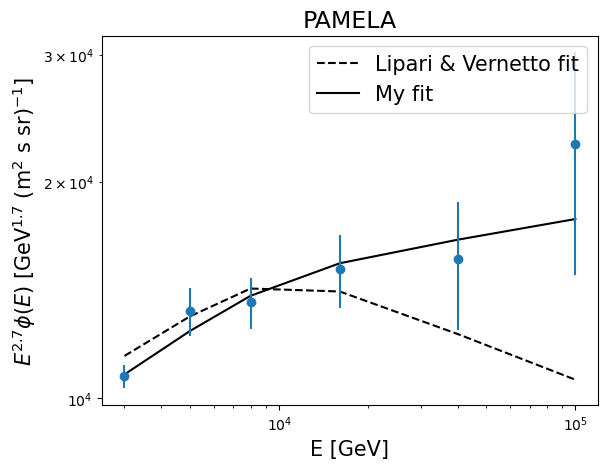

In [16]:
# Lipari & Vernetto
Phi_model = Phi_onebreak(E, K_bestfit_NUCLEON, 2 * 1e3, alpha2_bestfit_NUCLEON, alpha3_bestfit_NUCLEON, omega2_bestfit_NUCLEON, Eb2_bestfit_NUCLEON)
# Me
Phi_fit = Phi_onebreak(E, best_fit_values[0], 2 * 1e3, best_fit_values[1], best_fit_values[2], best_fit_values[3], best_fit_values[4])

plt.plot(E, Phi_model * E**2.7, linestyle='--', color='black', label='Lipari & Vernetto fit')
plt.plot(E, Phi_fit * E**2.7, color='black', label='My fit')
plt.errorbar(E_NUCLEON[index], flux_NUCLEON[index] * E_NUCLEON[index]**2.7, yerr=error_NUCLEON[index] * E_NUCLEON[index]**2.7, fmt='o')
plt.loglog()
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=15)
plt.xlabel('E [GeV]', fontsize=15)
plt.title('PAMELA', fontsize=17)
plt.legend(fontsize=15)